In [21]:
# Location-Based Recommendations
# Recommendation systems are widely utilized in different applications for predicting the preference or rating of a user 
# in a product or service. Most likely you have come across or interacted with some type of recommender systems in the past 
# few minutes or hours in your online presence.
# These Recommender systems can be of different types and the most prominent ones include Content-based filtering and Collaborative
# filtering. In this article, we will study location-based recommendations, where we specifically focus on geographic locations to render 
# more relevant recommendations utilizing the location of the users.

# To illustrate the crucial aspects of location-based recommenders we will perform a simple Location-based recommendation using the
#  K-Means algorithm with Yelp Dataset from Kaggle.

In [22]:
!pip install descartes 
!pip install folium 
!pip install plotly_express
!pip install geopandas

In [23]:
import pandas as pd 
import numpy as np
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import folium

import plotly 
import plotly.offline as py
import plotly.graph_objs as go
import plotly_express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [24]:
os.chdir("D:\Ivy Professional School\Python\Datasets\input")

In [25]:
df = pd.read_json('yelp_academic_dataset_business.json', lines=True)
df.head()

business_id                             name  \
0  1SWheh84yJXfytovILXOAQ       Arizona Biltmore Golf Club   
1  QXAEGFB4oINsVuTFxEYKFQ       Emerald Chinese Restaurant   
2  gnKjwL_1w79qoiV3IC_xQQ      Musashi Japanese Restaurant   
3  xvX2CttrVhyG2z1dFg_0xw  Farmers Insurance - Paul Lorenz   
4  HhyxOkGAM07SRYtlQ4wMFQ              Queen City Plumbing   

                          address         city state postal_code   latitude  \
0     2818 E Camino Acequia Drive      Phoenix    AZ       85016  33.522143   
1            30 Eglinton Avenue W  Mississauga    ON     L5R 3E7  43.605499   
2       10110 Johnston Rd, Ste 15    Charlotte    NC       28210  35.092564   
3   15655 W Roosevelt St, Ste 237     Goodyear    AZ       85338  33.455613   
4  4209 Stuart Andrew Blvd, Ste F    Charlotte    NC       28217  35.190012   

    longitude  stars  review_count  is_open  \
0 -112.018481    3.0             5        0   
1  -79.652289    2.5           128        1   
2  -80.859132    4.0           170        1   
3 -112.395596    5.0             3        1   
4  -80.887223    4.0             4        1   

                                          attributes  \
0                           {'GoodForKids': 'False'}   
1  {'RestaurantsReservations': 'True', 'GoodForMe...   
2  {'GoodForKids': 'True', 'NoiseLevel': 'u'avera...   
3                                               None   
4  {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...   

                                          categories  \
0                                  Golf, Active Life   
1  Specialty Food, Restaurants, Dim Sum, Imported...   
2                  Sushi Bars, Restaurants, Japanese   
3                      Insurance, Financial Services   
4  Plumbing, Shopping, Local Services, Home Servi...   

                                               hours  
0                                               None  
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...  
2  {'Monday': '17:30-21:30', 'Wednesday': '17:30-...  
3  {'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...  
4  {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...

In [26]:
df.shape

(192609, 14)

## Exploratory Data Analaysis (EDA)

In [27]:
df['Restaurants'] = df['categories'].str.contains('Restaurants')
df.head(2)

business_id                        name  \
0  1SWheh84yJXfytovILXOAQ  Arizona Biltmore Golf Club   
1  QXAEGFB4oINsVuTFxEYKFQ  Emerald Chinese Restaurant   

                       address         city state postal_code   latitude  \
0  2818 E Camino Acequia Drive      Phoenix    AZ       85016  33.522143   
1         30 Eglinton Avenue W  Mississauga    ON     L5R 3E7  43.605499   

    longitude  stars  review_count  is_open  \
0 -112.018481    3.0             5        0   
1  -79.652289    2.5           128        1   

                                          attributes  \
0                           {'GoodForKids': 'False'}   
1  {'RestaurantsReservations': 'True', 'GoodForMe...   

                                          categories  \
0                                  Golf, Active Life   
1  Specialty Food, Restaurants, Dim Sum, Imported...   

                                               hours Restaurants  
0                                               None       False  
1  {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...        True

In [28]:
df_restaurants = df.loc[df.Restaurants == True]
df_restaurants.head()

business_id                         name  \
1   QXAEGFB4oINsVuTFxEYKFQ   Emerald Chinese Restaurant   
2   gnKjwL_1w79qoiV3IC_xQQ  Musashi Japanese Restaurant   
11  1Dfx3zM-rW4n-31KeC8sJg                    Taco Bell   
13  fweCYi8FmbJXHCqLnwuk8w                Marco's Pizza   
17  PZ-LZzSlhSe9utkQYU8pFg   Carluccio's Tivoli Gardens   

                         address                city state postal_code  \
1           30 Eglinton Avenue W         Mississauga    ON     L5R 3E7   
2      10110 Johnston Rd, Ste 15           Charlotte    NC       28210   
11       2450 E Indian School Rd             Phoenix    AZ       85016   
13               5981 Andrews Rd  Mentor-on-the-Lake    OH       44060   
17  1775 E Tropicana Ave, Ste 29           Las Vegas    NV       89119   

     latitude   longitude  stars  review_count  is_open  \
1   43.605499  -79.652289    2.5           128        1   
2   35.092564  -80.859132    4.0           170        1   
11  33.495194 -112.028588    3.0            18        1   
13  41.708520  -81.359556    4.0            16        1   
17  36.100016 -115.128529    4.0            40        0   

                                           attributes  \
1   {'RestaurantsReservations': 'True', 'GoodForMe...   
2   {'GoodForKids': 'True', 'NoiseLevel': 'u'avera...   
11  {'RestaurantsTakeOut': 'True', 'BusinessParkin...   
13  {'RestaurantsPriceRange2': '2', 'BusinessAccep...   
17  {'OutdoorSeating': 'False', 'BusinessAcceptsCr...   

                                           categories  \
1   Specialty Food, Restaurants, Dim Sum, Imported...   
2                   Sushi Bars, Restaurants, Japanese   
11  Restaurants, Breakfast & Brunch, Mexican, Taco...   
13         Italian, Restaurants, Pizza, Chicken Wings   
17                               Restaurants, Italian   

                                                hours Restaurants  
1   {'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W...        True  
2   {'Monday': '17:30-21:30', 'Wednesday': '17:30-...        True  
11  {'Monday': '7:0-0:0', 'Tuesday': '7:0-0:0', 'W...        True  
13  {'Monday': '10:0-0:0', 'Tuesday': '10:0-0:0', ...        True  
17                                               None        True

In [29]:
df_restaurants.shape

(59371, 15)

In [30]:
print(df_restaurants.columns)

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'Restaurants'],
      dtype='object')


In [31]:
df.dtypes

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
Restaurants      object
dtype: object

In [32]:
df.isnull().sum()

business_id         0
name                0
address             0
city                0
state               0
postal_code         0
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      28836
categories        482
hours           44830
Restaurants       482
dtype: int64

In [33]:
df_restaurants['stars'].unique()

array([2.5, 4. , 3. , 4.5, 3.5, 2. , 5. , 1.5, 1. ])

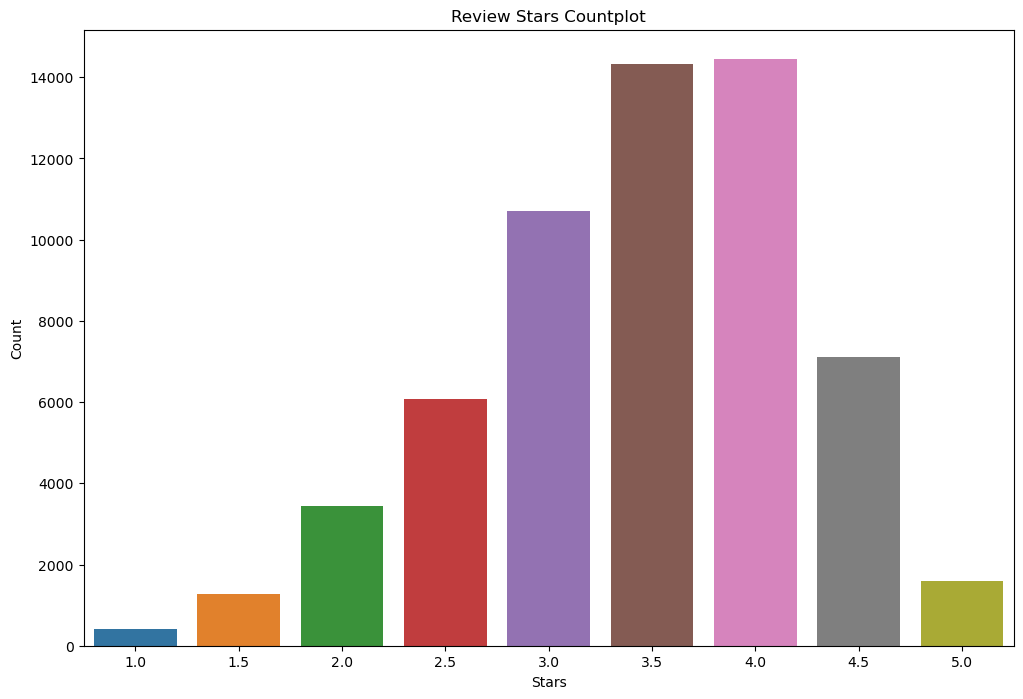

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_restaurants is your DataFrame
fig, ax = plt.subplots(figsize=(12, 8))

# Group by 'stars' and count the occurrences
stars_counts = df_restaurants.groupby('stars').size().reset_index(name='counts')

# Create a bar plot based on the grouped data
sns.barplot(x='stars', y='counts', data=stars_counts, ax=ax)

plt.title('Review Stars Countplot')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.savefig('stars_grouped.png')  # Save the plot as an image file
plt.show()  # Display the plot


In [35]:
top_restaurants = df_restaurants.sort_values(by=['review_count', 'stars'], ascending=False)[:20]
top_restaurants.head()

business_id                 name                address  \
82250   4JNXUYY8wbaaDmk3BPzlWw         Mon Ami Gabi  3655 Las Vegas Blvd S   
89206   RESDUcs7fIiihp38-d6_6g     Bacchanal Buffet  3570 S Las Vegas Blvd   
35199   K7lWdNUhCbcnEvI0NhGewg         Wicked Spoon  3708 Las Vegas Blvd S   
58852   f4x1YBxkLrZg652xt2KR5g   Hash House A Go Go    3535 Las Vegas Blvd   
141820  cYwJA2A6I12KNkm2rtXd5g  Gordon Ramsay BurGR  3667 Las Vegas Blvd S   

             city state postal_code   latitude   longitude  stars  \
82250   Las Vegas    NV       89109  36.112859 -115.172434    4.0   
89206   Las Vegas    NV       89109  36.116113 -115.176222    4.0   
35199   Las Vegas    NV       89109  36.109550 -115.176155    3.5   
58852   Las Vegas    NV       89109  36.118181 -115.171580    4.0   
141820  Las Vegas    NV       89109  36.110724 -115.172169    4.0   

        review_count  is_open  \
82250           8348        1   
89206           8339        1   
35199           6708        1   
58852           5763        1   
141820          5484        0   

                                               attributes  \
82250   {'Corkage': 'True', 'RestaurantsDelivery': 'Fa...   
89206   {'NoiseLevel': 'u'average'', 'HasTV': 'False',...   
35199   {'GoodForKids': 'True', 'RestaurantsPriceRange...   
58852   {'BusinessAcceptsCreditCards': 'True', 'Restau...   
141820  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...   

                                               categories  \
82250   Food, French, Breakfast & Brunch, Restaurants,...   
89206   Restaurants, Buffets, Sandwiches, Food, Breakf...   
35199            Buffets, Breakfast & Brunch, Restaurants   
58852   Breakfast & Brunch, Food, Restaurants, America...   
141820       Restaurants, Burgers, American (Traditional)   

                                                    hours Restaurants  
82250   {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        True  
89206   {'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...        True  
35199   {'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...        True  
58852   {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        True  
141820  {'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...        True

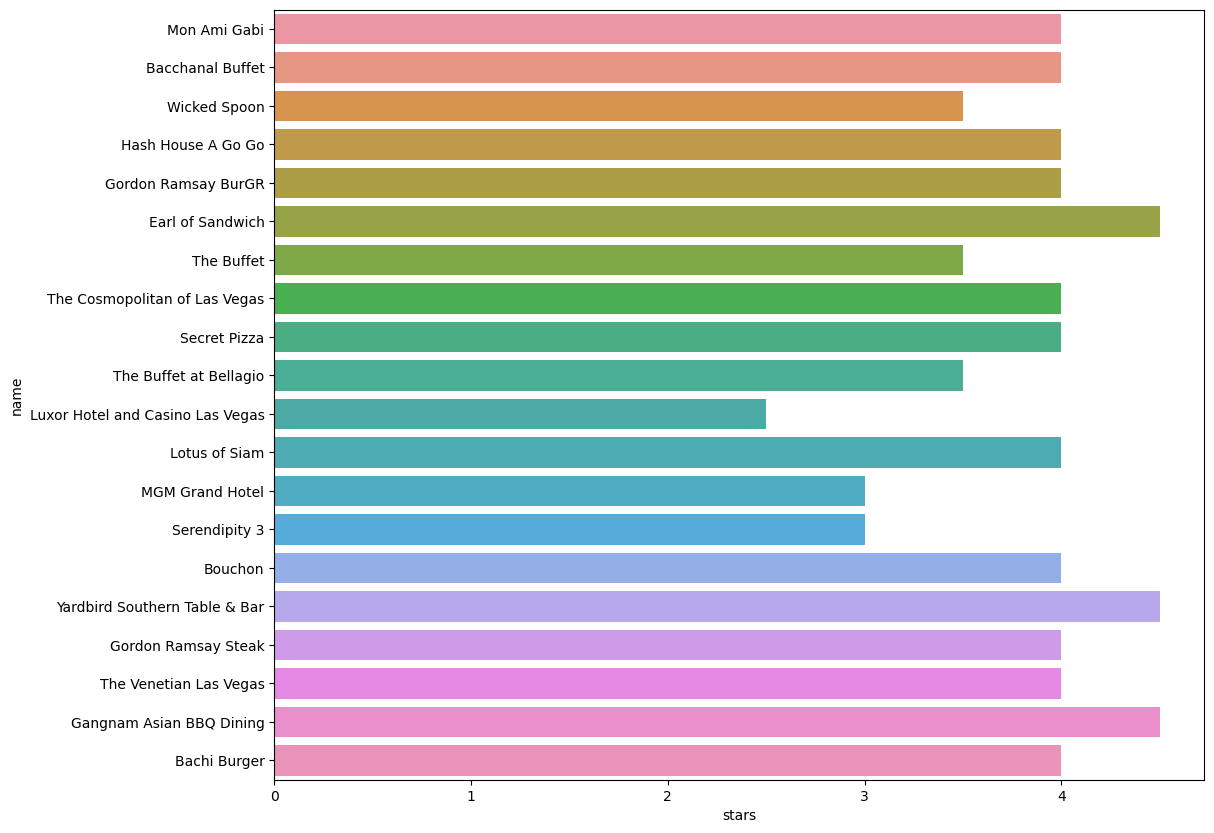

In [36]:
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x = 'stars', y = 'name', data=top_restaurants, ax= ax);
plt.savefig('top20_restaurants.png')
plt.show()

In [37]:
!pip install --upgrade plotly

In [38]:
!pip install --upgrade ipykernel

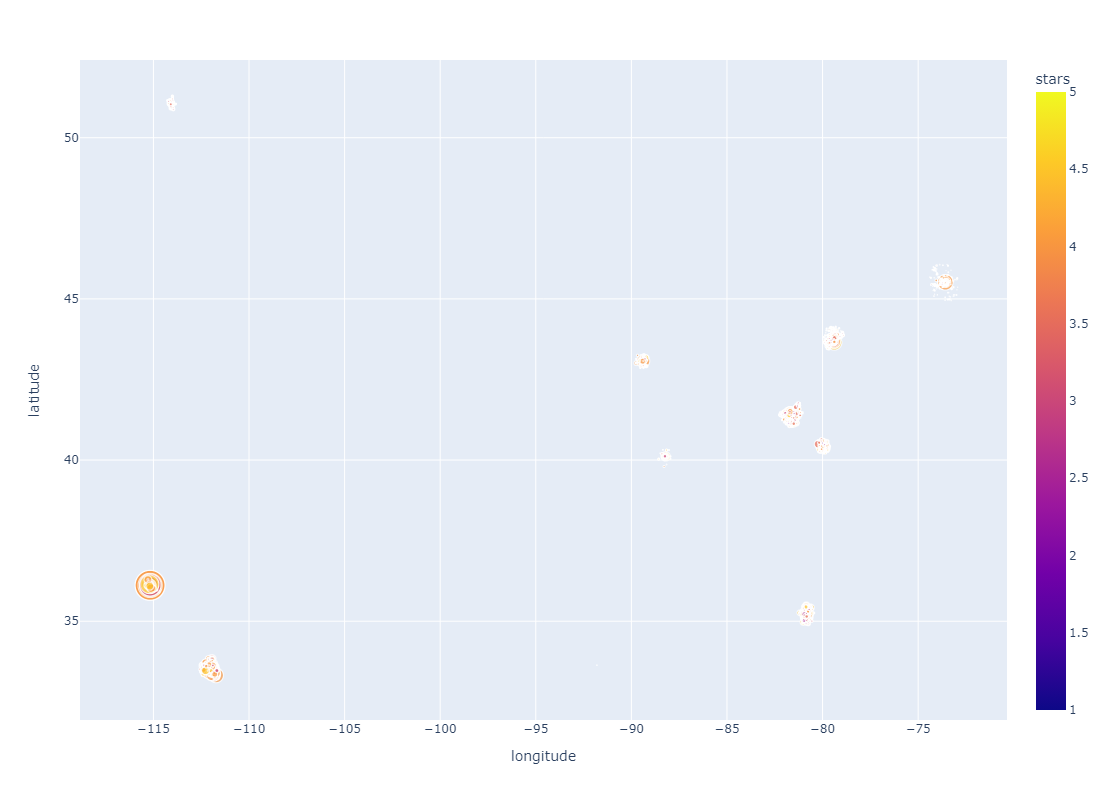

In [39]:
import plotly.express as px

# Assuming df_restaurants is your DataFrame
fig = px.scatter(df_restaurants, x="longitude", y="latitude", color="stars", size='review_count',
                 size_max=30, width=1200, height=800)

# Show the plot
fig.show()

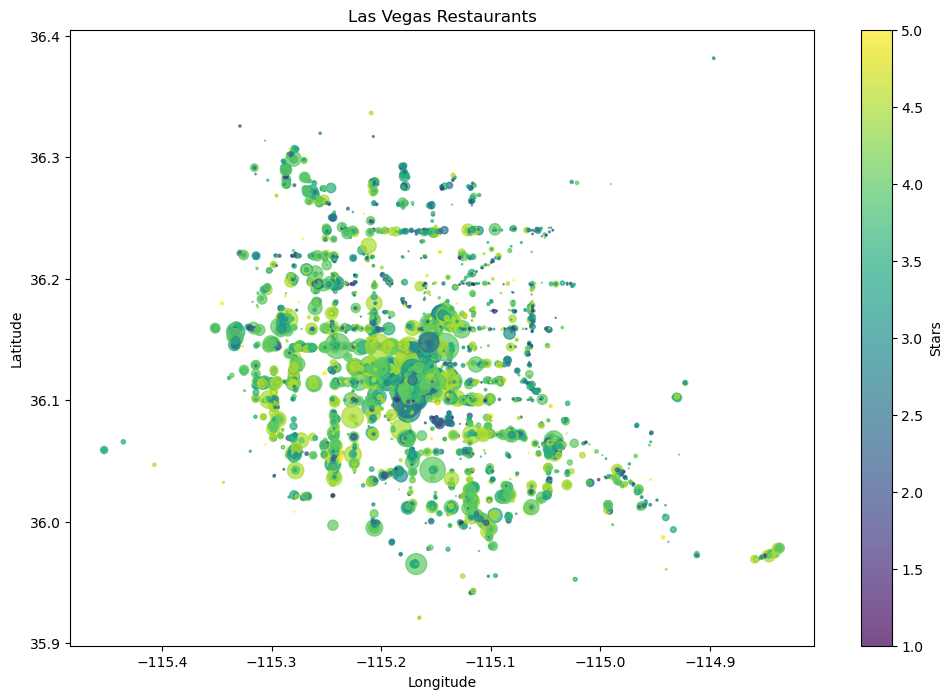

In [44]:
import matplotlib.pyplot as plt

# Assuming lasVegas is your DataFrame containing Las Vegas restaurant data
lasVegas = df_restaurants[df_restaurants.state == 'NV']

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(lasVegas['longitude'], lasVegas['latitude'], c=lasVegas['stars'], s=lasVegas['review_count'] / 10,
            cmap='viridis', alpha=0.7)

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Stars')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Las Vegas Restaurants')

# Show the plot
plt.show()


## K-Means Clustering

### Determinig the number of clusters (K)

In [45]:
# Elbow method to determine the number of K in Kmeans Clustering
coords = lasVegas[['longitude','latitude']]

distortions = []
K = range(1,25)
for k in K:
    kmeansModel = KMeans(n_clusters=k)
    kmeansModel = kmeansModel.fit(coords)
    distortions.append(kmeansModel.inertia_)



C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default val

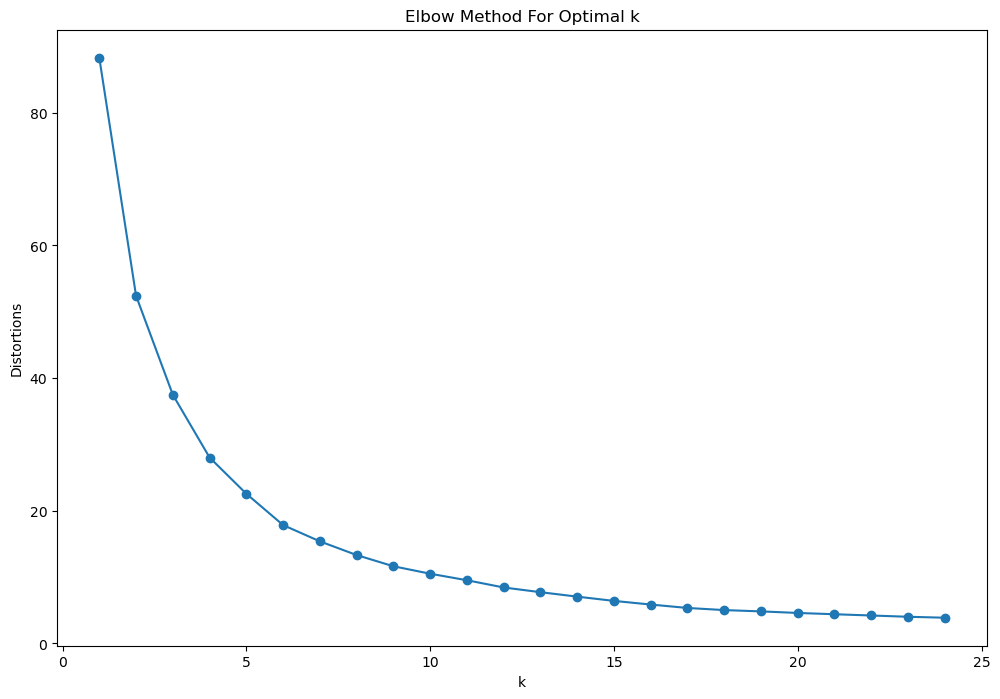

In [46]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(K, distortions, marker='o')
plt.xlabel('k')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
# plt.savefig('elbow.png')
plt.show()

# Silhoute method

In [47]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 50

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(coords)
  labels = kmeans.labels_
  sil.append(silhouette_score(coords, labels, metric = 'euclidean'))

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default val

In [48]:
sil

[0.38509735838622017,
 0.3666485409730202,
 0.39125606423022724,
 0.38899465562409596,
 0.4109134472677702,
 0.4183691869114546,
 0.4255074350529199,
 0.4047355021458808,
 0.41169601387484217,
 0.40733314072844473,
 0.41795492050490646,
 0.4307734936577507,
 0.4323328136917946,
 0.43128448299555433,
 0.43815328881449017,
 0.445936287937327,
 0.4432149616562541,
 0.43441254522367245,
 0.43784075331083605,
 0.43216638157097864,
 0.4222811910117346,
 0.43769220843709367,
 0.4477285981575878,
 0.42454840198866395,
 0.43109939044564344,
 0.421037830377003,
 0.4220204356365021,
 0.4288436562131291,
 0.42836805829868413,
 0.4351386140490193,
 0.4236543105095108,
 0.4278956341132511,
 0.44865037073441616,
 0.4478389795542024,
 0.4335557012184489,
 0.4423532233300595,
 0.44342822247820396,
 0.43528047121412194,
 0.45004559364683905,
 0.4412156631964391,
 0.44190712533150406,
 0.4437111813689587,
 0.45477107226713687,
 0.43992354692218766,
 0.45045538384970735,
 0.45494334909595274,
 0.453167519

### K-Means Clustering

In [49]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(coords)
y = kmeans.labels_
print("k = 5", " silhouette_score ", silhouette_score(coords, y, metric='euclidean'))

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k = 5  silhouette_score  0.3890110268873033


In [50]:
lasVegas['cluster'] = kmeans.predict(lasVegas[['longitude','latitude']])
lasVegas.head()

C:\Users\koushik\AppData\Local\Temp\ipykernel_17224\403706406.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



business_id                                 name  \
17   PZ-LZzSlhSe9utkQYU8pFg           Carluccio's Tivoli Gardens   
25   tstimHoMcYbkSC4eBA1wEg  Maria's Mexican Restaurant & Bakery   
75   kANF0dbeoW34s2vwh6Umfw                          Dairy Queen   
111  X8mtoSxY8whtmbDlj0D3Aw                Imperial Asian Buffet   
135  bJP4l_BGq2CudEu0m-wNjg             Artisan Fine Dining Room   

                              address       city state postal_code   latitude  \
17       1775 E Tropicana Ave, Ste 29  Las Vegas    NV       89119  36.100016   
25              6055 E Lake Mead Blvd  Las Vegas    NV       89156  36.195615   
75            6125 Spring Mountain Rd  Las Vegas    NV       89146  36.125031   
111                  4343 N Rancho Dr  Las Vegas    NV       89030  36.238596   
135  Artisan Hotel, 1501 W Sahara Ave  Las Vegas    NV       89102  36.143672   

      longitude  stars  review_count  is_open  \
17  -115.128529    4.0            40        0   
25  -115.040529    4.5           184        1   
75  -115.225620    2.0            33        0   
111 -115.233331    2.0             4        1   
135 -115.169792    2.0             3        0   

                                            attributes  \
17   {'OutdoorSeating': 'False', 'BusinessAcceptsCr...   
25   {'BikeParking': 'True', 'BusinessParking': '{'...   
75   {'RestaurantsPriceRange2': '1', 'Ambience': '{...   
111                                               None   
135  {'RestaurantsAttire': ''dressy'', 'Corkage': '...   

                                            categories  \
17                                Restaurants, Italian   
25   Mexican, Restaurants, Patisserie/Cake Shop, Fo...   
75   Fast Food, Food, Restaurants, Ice Cream & Froz...   
111                               Restaurants, Chinese   
135        Restaurants, Pizza, Italian, American (New)   

                                                 hours Restaurants  cluster  
17                                                None        True        0  
25   {'Monday': '11:0-21:0', 'Tuesday': '10:0-21:0'...        True        2  
75                                                None        True        0  
111                                               None        True        4  
135  {'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...        True        0

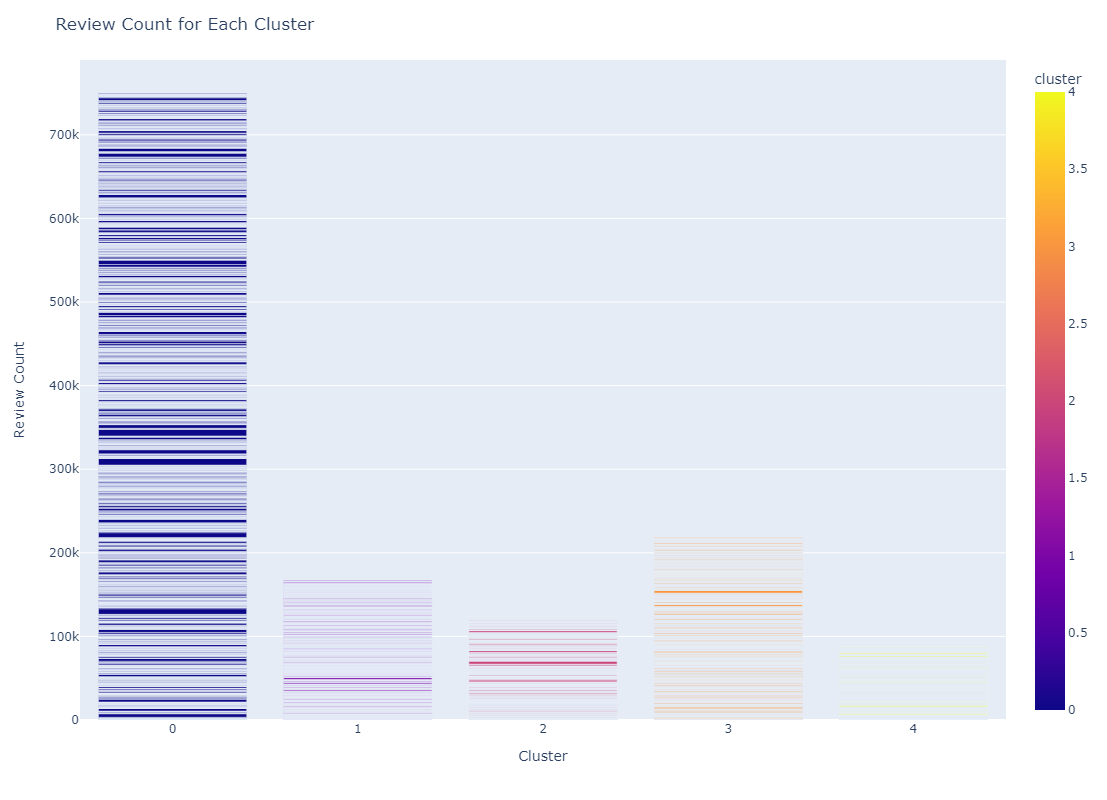

In [51]:
import plotly.express as px

# Assuming lasVegas is your DataFrame
fig = px.bar(lasVegas, x="cluster", y="review_count", color="cluster",
             hover_data=['name', 'latitude', 'longitude'], width=1200, height=800)

# Set axis labels and plot title
fig.update_layout(xaxis_title='Cluster', yaxis_title='Review Count', title='Review Count for Each Cluster')

# Show the plot
fig.show()


## Location-Based Recommendation

In [52]:
top_restaurants_lasVegas = lasVegas.sort_values(by=['review_count', 'stars'], ascending=False)
top_restaurants_lasVegas.head()

business_id                 name                address  \
82250   4JNXUYY8wbaaDmk3BPzlWw         Mon Ami Gabi  3655 Las Vegas Blvd S   
89206   RESDUcs7fIiihp38-d6_6g     Bacchanal Buffet  3570 S Las Vegas Blvd   
35199   K7lWdNUhCbcnEvI0NhGewg         Wicked Spoon  3708 Las Vegas Blvd S   
58852   f4x1YBxkLrZg652xt2KR5g   Hash House A Go Go    3535 Las Vegas Blvd   
141820  cYwJA2A6I12KNkm2rtXd5g  Gordon Ramsay BurGR  3667 Las Vegas Blvd S   

             city state postal_code   latitude   longitude  stars  \
82250   Las Vegas    NV       89109  36.112859 -115.172434    4.0   
89206   Las Vegas    NV       89109  36.116113 -115.176222    4.0   
35199   Las Vegas    NV       89109  36.109550 -115.176155    3.5   
58852   Las Vegas    NV       89109  36.118181 -115.171580    4.0   
141820  Las Vegas    NV       89109  36.110724 -115.172169    4.0   

        review_count  is_open  \
82250           8348        1   
89206           8339        1   
35199           6708        1   
58852           5763        1   
141820          5484        0   

                                               attributes  \
82250   {'Corkage': 'True', 'RestaurantsDelivery': 'Fa...   
89206   {'NoiseLevel': 'u'average'', 'HasTV': 'False',...   
35199   {'GoodForKids': 'True', 'RestaurantsPriceRange...   
58852   {'BusinessAcceptsCreditCards': 'True', 'Restau...   
141820  {'RestaurantsGoodForGroups': 'True', 'Alcohol'...   

                                               categories  \
82250   Food, French, Breakfast & Brunch, Restaurants,...   
89206   Restaurants, Buffets, Sandwiches, Food, Breakf...   
35199            Buffets, Breakfast & Brunch, Restaurants   
58852   Breakfast & Brunch, Food, Restaurants, America...   
141820       Restaurants, Burgers, American (Traditional)   

                                                    hours Restaurants  cluster  
82250   {'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ...        True        0  
89206   {'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'...        True        0  
35199   {'Monday': '8:0-21:0', 'Tuesday': '8:0-21:0', ...        True        0  
58852   {'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...        True        0  
141820  {'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...        True        0

In [53]:
def recommend_restaurants(df, longitude, latitude):
    # Predict the cluster for longitude and latitude provided
    cluster = kmeans.predict(np.array([longitude,latitude]).reshape(1,-1))[0]
    print(cluster)
   
    # Get the best restaurant in this cluster
    return  df[df['cluster']==cluster].iloc[0:5][['name', 'latitude','longitude'	]]
   

In [54]:
recommend_restaurants(top_restaurants_lasVegas,-115.1891691,  36.1017316)

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



0


name   latitude   longitude
82250          Mon Ami Gabi  36.112859 -115.172434
89206      Bacchanal Buffet  36.116113 -115.176222
35199          Wicked Spoon  36.109550 -115.176155
58852    Hash House A Go Go  36.118181 -115.171580
141820  Gordon Ramsay BurGR  36.110724 -115.172169

In [55]:
recommend_restaurants(top_restaurants_lasVegas,-115.2798544, 36.0842838) 

3


C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



name   latitude   longitude
131069                Hash House A Go Go  36.144713 -115.240092
116890                        Echo & Rig  36.166576 -115.286232
42288       Red Rock Casino Resort & Spa  36.156413 -115.332847
11169   Juan's Flaming Fajitas & Cantina  36.100509 -115.302689
9191                          Honey Salt  36.160577 -115.292996

In [56]:
recommend_restaurants(top_restaurants_lasVegas, 	-115.082821, 36.155011 )

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



2


name   latitude   longitude
111864   Lotus of Siam  36.143664 -115.141891
79764             Eat.  36.166900 -115.138977
127088      Pizza Rock  36.171618 -115.142267
55675   Carson Kitchen  36.167878 -115.140640
160676   Golden Nugget  36.169781 -115.145534

In [57]:
test_coordinates = {
    'user': [1, 2, 3], 
    'latitude' : [36.1017316, 36.0842838, 36.155011],
    'longitude' : [-115.1891691, -115.2798544, -115.082821],
}

test_df = pd.DataFrame(test_coordinates)
test_df

user   latitude   longitude
0     1  36.101732 -115.189169
1     2  36.084284 -115.279854
2     3  36.155011 -115.082821

In [58]:
user1 = test_df[test_df['user'] == 1]
user1

user   latitude   longitude
0     1  36.101732 -115.189169

C:\Users\koushik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



0


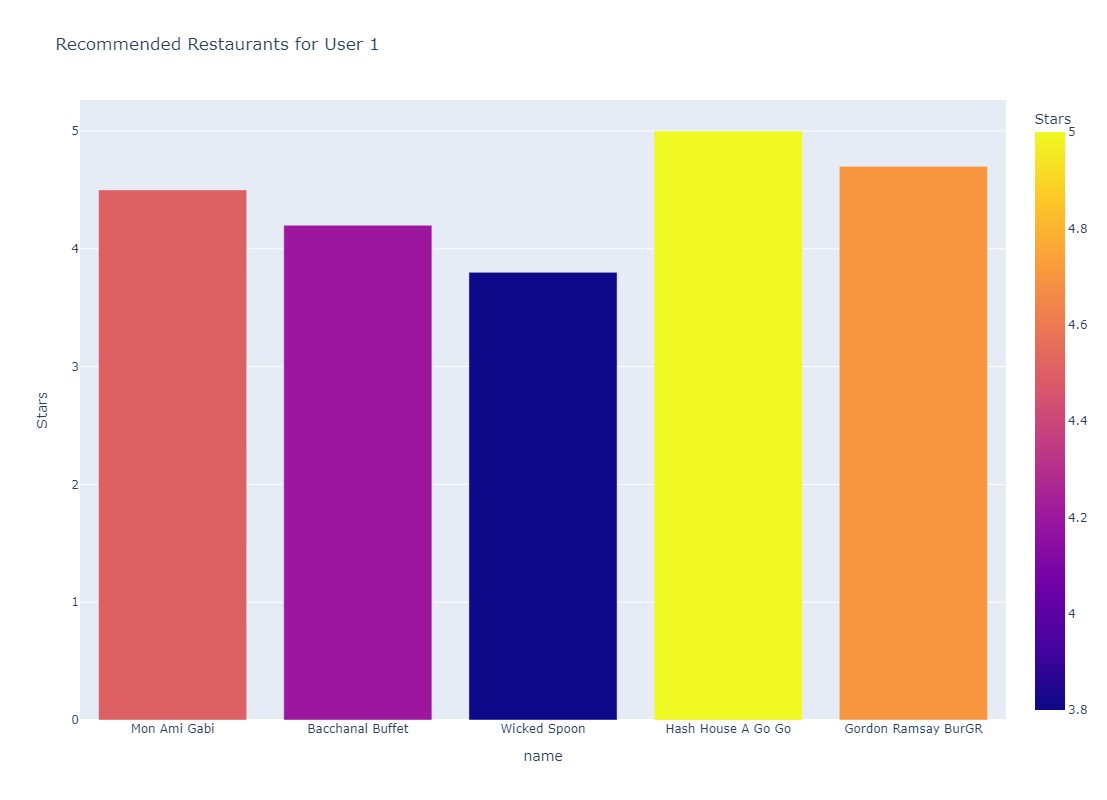

In [59]:
import plotly.express as px

# Assuming user1 is your DataFrame containing user-specific data
user1 = test_df[test_df['user'] == 1].reset_index()

# Assuming recommend_restaurants returns a DataFrame with recommended restaurants
recommended_restaurants = recommend_restaurants(top_restaurants_lasVegas, user1.longitude, user1.latitude)

# Include 'stars' column in the DataFrame
recommended_restaurants['stars'] = [4.5, 4.2, 3.8, 5.0, 4.7]  # Replace with actual star ratings

# Create a bar chart
fig = px.bar(recommended_restaurants, x='name', y='stars', color='stars',
             hover_data=['latitude', 'longitude'], labels={'stars': 'Stars'},
             title='Recommended Restaurants for User 1')

# Customize the layout
fig.update_layout(width=1200, height=800)

# Show the plot
fig.show()


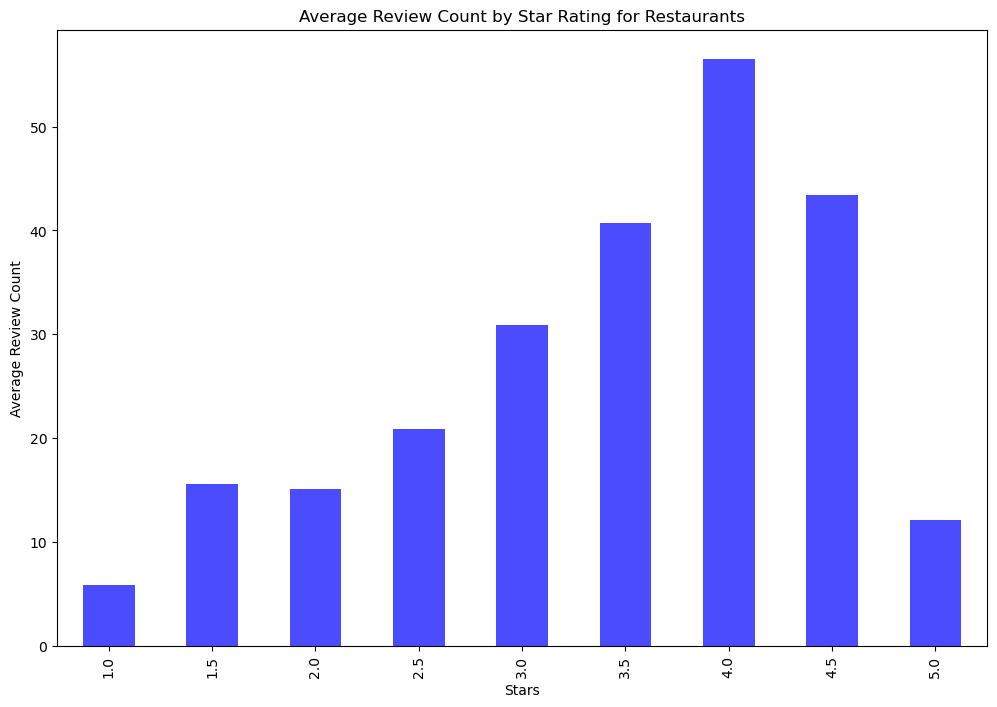

In [61]:
import matplotlib.pyplot as plt

# Group by 'stars' and calculate the mean review count for each star rating
stars_review_mean = df.groupby('stars')['review_count'].mean()

# Create a bar plot
plt.figure(figsize=(12, 8))
stars_review_mean.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Review Count by Star Rating for Restaurants')
plt.xlabel('Stars')
plt.ylabel('Average Review Count')

# Show the plot
plt.show()
